In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("spam_data.csv")
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 1. Data cleaning


In [2]:
df=data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True )

In [5]:
df.sample(5)

,v1,v2
154,ham,"You are everywhere dirt, on the floor, the win..."
4327,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
828,ham,"Sorry light turned green, I meant another frie..."
1780,spam,BIG BROTHER ALERT! The computer has selected u...
3406,ham,Beautiful Truth against Gravity.. Read careful...


In [6]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
999,ham,"Aight will do, thanks again for comin out"
4614,spam,Sunshine Quiz! Win a super Sony DVD recorder i...
929,spam,money!!! you r a lucky winner ! 2 claim your p...
3106,ham,Hi. Happy New Year. I dont mean to intrude but...
3060,ham,What u talking bout early morning? It's almost...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#check missing values

In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#check for duplicate values
df.duplicated().sum()

403

In [13]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

## 2.EDA

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

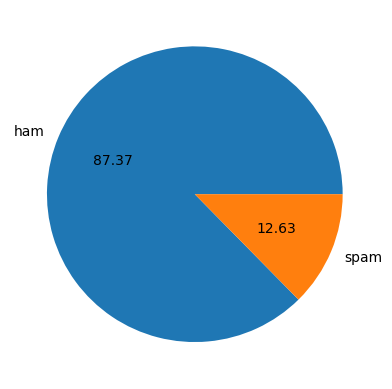

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [18]:
#data is imbalaced

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eshakunder/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#number of characters in the each sentences
df['num_characters']= df['text'].apply(len)

/var/folders/hz/ljttb8jn1_76tktqc42tnpzm0000gn/T/ipykernel_1289/3107541484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']= df['text'].apply(len)


In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#number of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [23]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

/var/folders/hz/ljttb8jn1_76tktqc42tnpzm0000gn/T/ipykernel_1289/1296417905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))


0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [25]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/var/folders/hz/ljttb8jn1_76tktqc42tnpzm0000gn/T/ipykernel_1289/4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

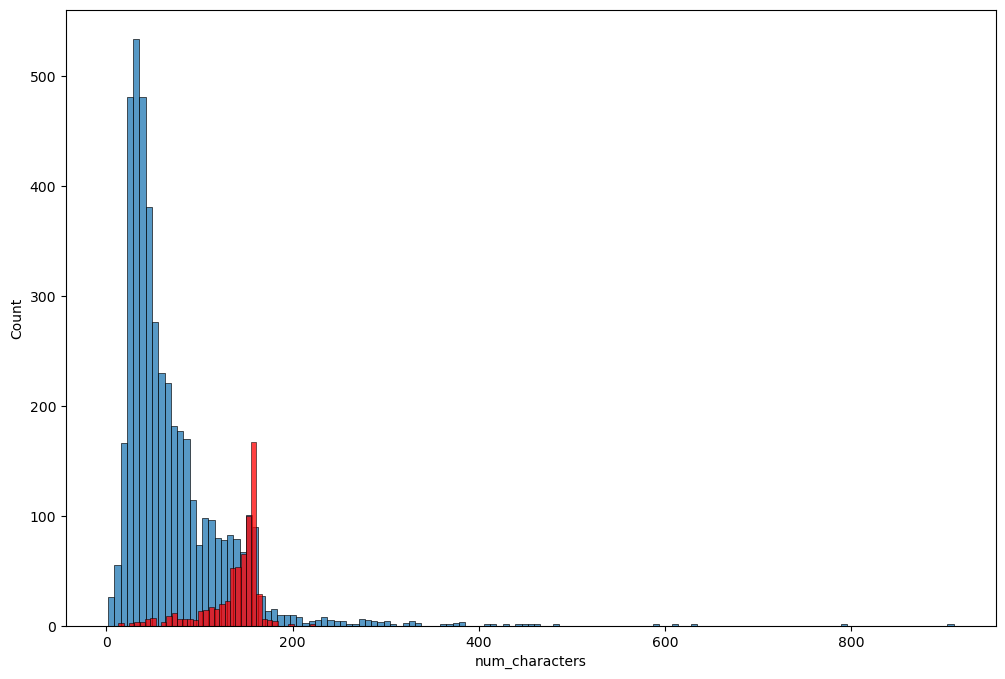

In [30]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

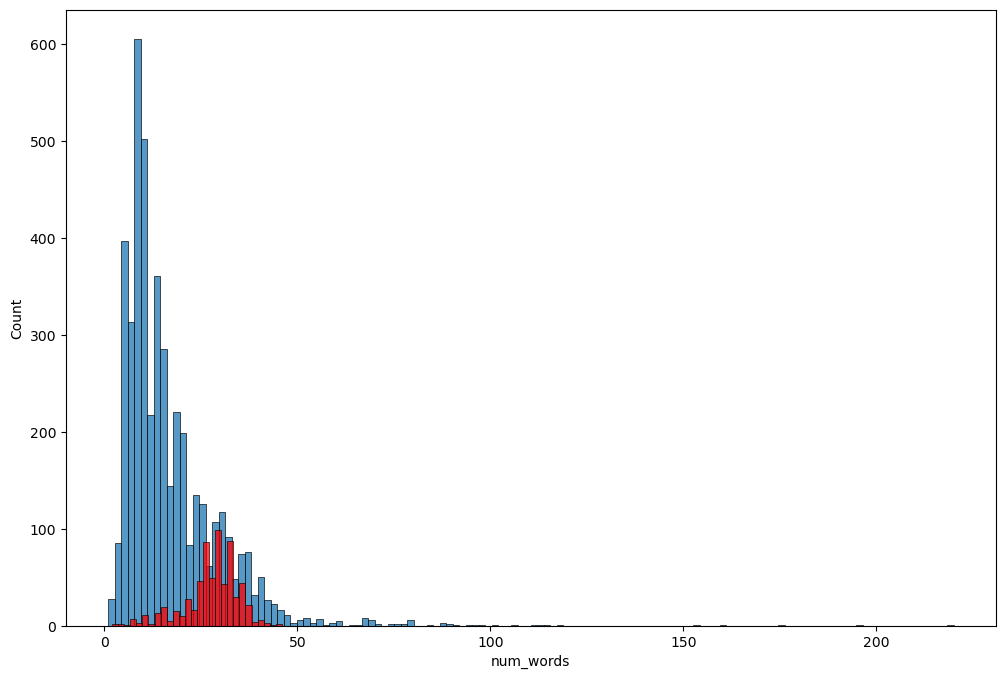

In [31]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


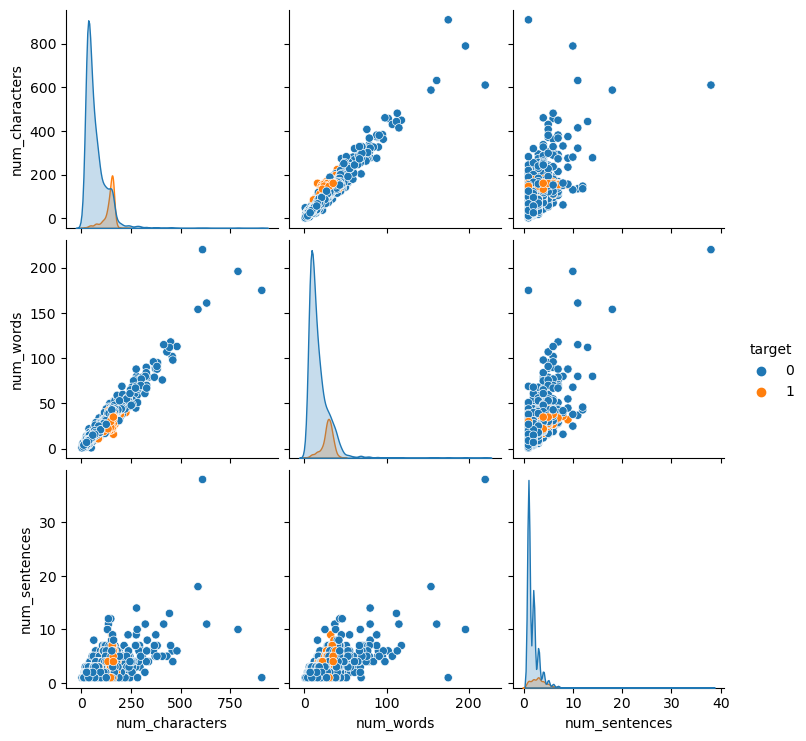

In [32]:
sns.pairplot(df,hue='target')

In [33]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


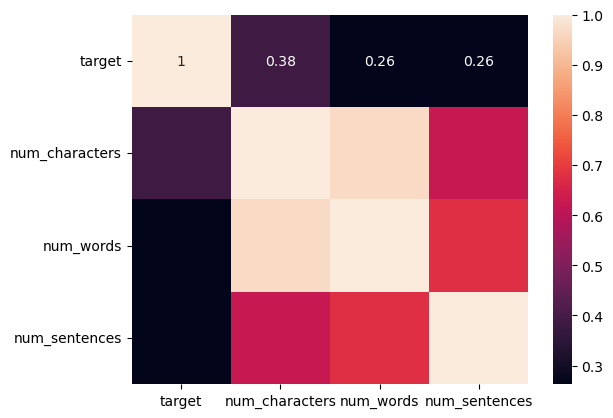

In [34]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df_numeric.corr(),annot=True)
plt.show()

## Data Preprocessing


In [35]:
#lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuations
#Stemming


In [36]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
stopwords.words('english')
ps = PorterStemmer()


In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]#copy y to text
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [38]:
df['transformed_text']=df['text'].apply(transform_text)

/var/folders/hz/ljttb8jn1_76tktqc42tnpzm0000gn/T/ipykernel_1289/4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [39]:
#to get word cloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

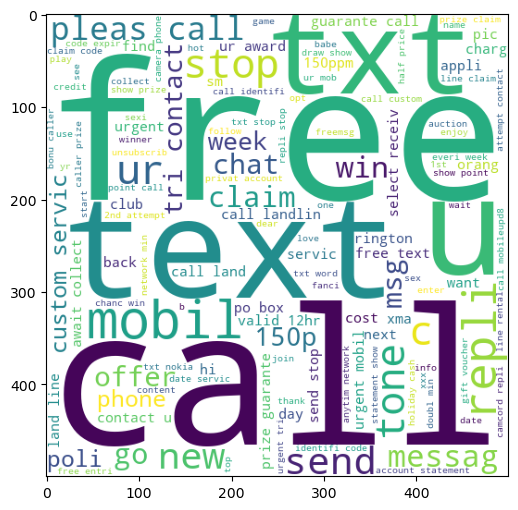

In [40]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

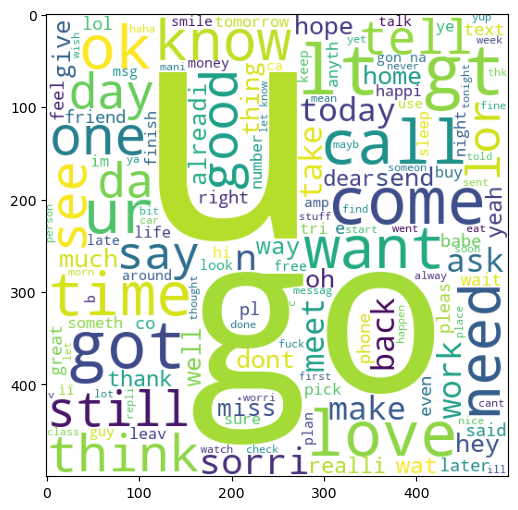

In [41]:
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [42]:
#to get the most common 50 words in spam
spam_corpus=[]
for msg in df[df["target"]==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

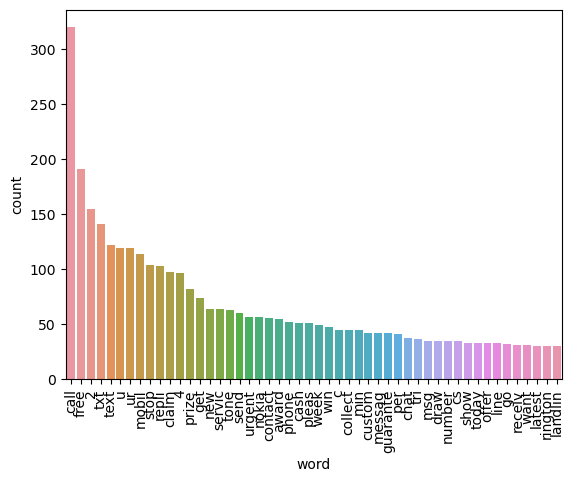

In [44]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is defined and contains the text data
spam_counter = Counter(spam_corpus)
most_common_50 = pd.DataFrame(spam_counter.most_common(50), columns=['word', 'count'])

# Plot
sns.barplot(x='word', y='count', data=most_common_50)
plt.xticks(rotation='vertical')
plt.show()


In [45]:
#to get the most common 50 words in ham
ham_corpus=[]
for msg in df[df["target"]==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [46]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

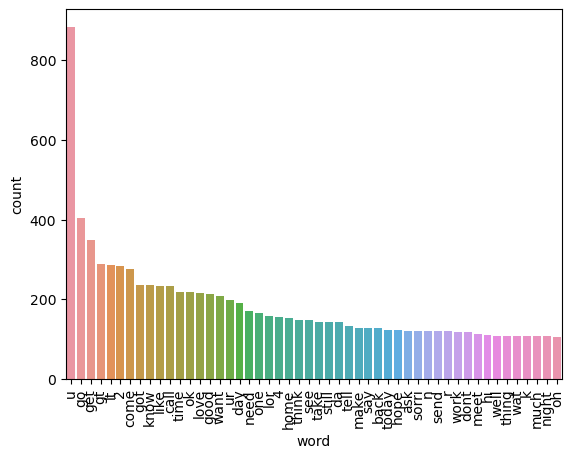

In [47]:

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is defined and contains the text data
ham_counter = Counter(ham_corpus)
most_common_50 = pd.DataFrame(ham_counter.most_common(50), columns=['word', 'count'])

# Plot
sns.barplot(x='word', y='count', data=most_common_50)

plt.xticks(rotation='vertical')
plt.show()


## 4.Model building

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf= TfidfVectorizer(max_features = 3000)

In [49]:

X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
y = df['target'].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:

x1_train,x1_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [54]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [55]:
#tfidf
gnb.fit(x1_train,y_train)
y_pred1_tfidf = gnb.predict(x1_test)
print(accuracy_score(y_test,y_pred1_tfidf))
print(confusion_matrix(y_test,y_pred1_tfidf))
print(precision_score(y_test,y_pred1_tfidf))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [56]:
mnb.fit(x1_train,y_train)
y_pred2_tfidf = mnb.predict(x1_test)
print(accuracy_score(y_test,y_pred2_tfidf))
print(confusion_matrix(y_test,y_pred2_tfidf))
print(precision_score(y_test,y_pred2_tfidf))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [57]:
bnb.fit(x1_train,y_train)
y_pred3_tfidf = bnb.predict(x1_test)
print(accuracy_score(y_test,y_pred3_tfidf))
print(confusion_matrix(y_test,y_pred3_tfidf))
print(precision_score(y_test,y_pred3_tfidf))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [58]:
#tfidf -> mnb

In [59]:
import pickle
pickle.dump(tfidf,open('vectorizer_final.pkl','wb'))
pickle.dump(mnb,open('model_final.pkl','wb'))